In [59]:
from scipy.io import loadmat
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning) # Turns off FutureWarnings
simplefilter(action='ignore', category=Warning)
import tensorflow as tf
import numpy  as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

dataset = loadmat('handwritten_digits_in_fmri_dataset/69dataset_split.mat')
NUM_VOXELS = dataset['y_test'].shape[1]
y_test = dataset['y_test']
y_train =  dataset['y_train']

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test  = scaler.transform(y_test)
# plt.hist(y_test.flatten(), bins=50)
# plt.figure()
# plt.hist(y_train.flatten(), bins=50)
# plt.show()

In [76]:
from Models.models import *
model_name = 'digit_wide_encoder'
# enc_param = encoder_param(NUM_VOXELS)
# enc_param.conv_ch = 192
# enc_param.drop_out = 0.5
# enc_param.image_channels = 1
# model = encoder(enc_param)
# model.load_weights('trained_encoders/' + model_name + '/model_weights.hdf5')
#model.load_weights('trained_encoders/' + model_name + '/best_ckpt.hdf5')

In [77]:
# y_pred = model.predict(dataset['x_test'])
# y_train_pred = model.predict(dataset['x_train'])
# np.savetxt('trained_encoders/' + model_name + '/y_pred.csv', y_pred)
# np.savetxt('trained_encoders/' + model_name + '/y_train_pred.csv', y_train_pred)


y_pred = np.loadtxt('trained_encoders/' + model_name + '/y_pred.csv')
y_train_pred = np.loadtxt('trained_encoders/' + model_name + '/y_train_pred.csv')
#y_pred = np.random.normal(0, 0.001, y_pred.shape)
# y_pred = np.broadcast_to(np.mean(dataset['y_train'], axis=0), shape=y_pred.shape)
# y_pred = np.add(y_pred, np.random.normal(0, 0.01, y_pred.shape), dtype=np.float32)
# plt.hist(y_pred.flatten(), bins=50)
# print(np.max(y_pred[:, 1000]))
# print(np.min(y_pred[:, 1000]))
# plt.show()

In [78]:
# Get correlations
from scipy import stats

voxel_corr = []
correlation = []
vc_p = []
for i in range(NUM_VOXELS):
    voxel_corr.append(stats.pearsonr(y_pred[:, i], y_test[:, i])[0])
    vc_p.append(stats.pearsonr(y_pred[:, i], y_test[:, i])[1])
for i in range(y_test.shape[0]):
    correlation.append(stats.pearsonr(y_test[i], y_pred[i])[0]) # returns correlation coefficient r and two tailed p-value

print('Mean Sample Correlation: ', np.mean(correlation))

print('Mean Voxel Correlation: ', np.mean(voxel_corr))

voxel_corr = np.array(voxel_corr)
np.savetxt('gwide_vc.csv', voxel_corr, delimiter=',')

Mean Sample Correlation:  0.2546134149797004
Mean Voxel Correlation:  0.19404379006535658


0.06429417571003572
0.3894444592064247
0.055266987375975615
0.06466811183635125


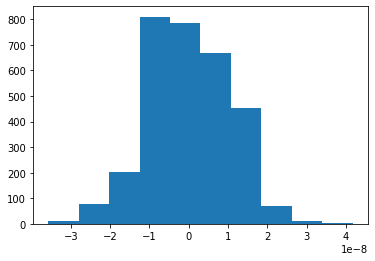

<Figure size 432x288 with 0 Axes>

In [63]:
mean = np.mean(y_train, axis=0)
plt.hist(mean)
plt.figure()
diff = np.subtract(y_train_pred, mean)
diff_mean = np.mean(abs(diff), axis=0)

diff = np.subtract(y_pred, mean)
diff_mean_2 = np.mean(abs(diff), axis=0)

print(np.mean(diff_mean))
print(np.max(diff_mean))
print(np.mean(diff_mean_2))

stds = np.std(y_pred, axis=0)
print(np.mean(stds))

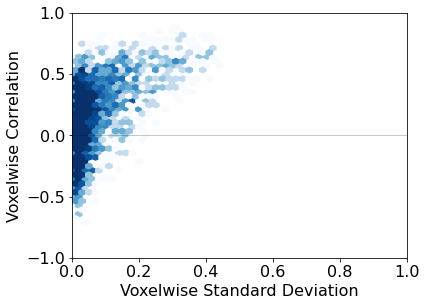

In [64]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(6, 4.5))
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.7)
plt.hexbin(stds, voxel_corr, cmap='Blues', gridsize=50, bins='log', vmax='15', extent=(0, 1, -1, 1))
plt.ylim(-1, 1)
plt.xlim(0, 1)
plt.xlabel('Voxelwise Standard Deviation')
plt.ylabel('Voxelwise Correlation')
#plt.colorbar()
#plt.savefig(os.path.join('trained_encoders', model_name, 'corr_std.png'), bbox_inches='tight', facecolor='white')
#plt.savefig(os.path.join('mean_corr_std.png'), bbox_inches='tight', facecolor='white')
plt.show()
#previous matplotlib version was 3.3.3
matplotlib.rcParams.update({'font.size': 10})

0.06466811183635125
0.0668784950865403
0.9912062


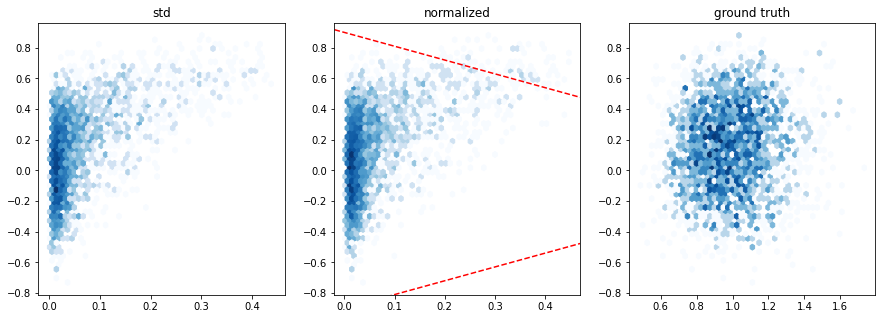

In [65]:
def plot_line(slope, intercept, y_lim=[0, 1], style='r--'):
    lims = plt.gca().get_ylim()
    plt.ylim(lims)
    plt.autoscale(False)
    y_vals = np.linspace(y_lim[0], y_lim[1], num=50)
    x_vals = (y_vals - intercept)/slope
    plt.plot(x_vals, y_vals, style)

stds = np.std(y_pred, axis=0)
stdtest = np.std(y_test, axis=0)
print(np.mean(stds))
print(np.mean(stds/stdtest))
print(np.mean(stdtest))
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hexbin(stds, voxel_corr, cmap='Blues', gridsize=50, bins='log')
plt.title('std')
plt.subplot(1, 3, 2)
plt.hexbin(stds/stdtest, voxel_corr, cmap='Blues', gridsize=50, bins='log')
plt.title('normalized')
plot_line(0.9, -0.9, [-1, 0])
plot_line(-0.9, 0.9, [0, 1])
plt.subplot(1, 3, 3)
plt.hexbin(stdtest, voxel_corr, cmap='Blues', gridsize=50, bins='log')
plt.title('ground truth')
plt.show()

0.7197931520635247


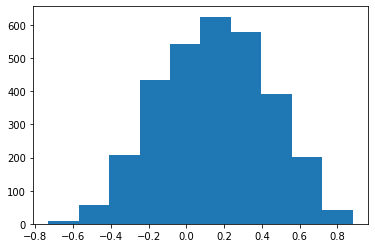

In [66]:
import matplotlib.pyplot as plt

vc_sorted = np.sort(voxel_corr)
print(np.mean(vc_sorted[-100:]))
plt.hist(voxel_corr)
plt.show()

(3092,)


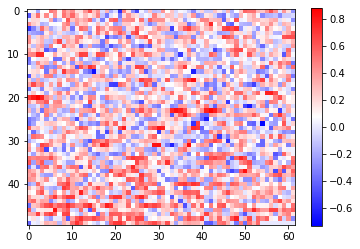

In [67]:
voxel_corr_2d = np.array(voxel_corr)
print(voxel_corr_2d.shape)
voxel_corr_2d.resize(3100)
voxel_corr_2d  = np.reshape(voxel_corr_2d, (50, 62))
plt.imshow(voxel_corr_2d, cmap='bwr')
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

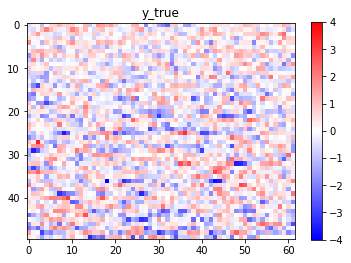

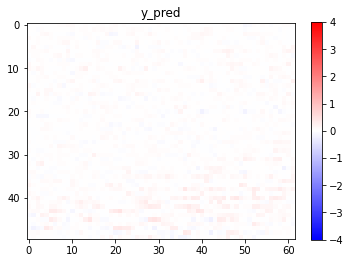

<Figure size 432x288 with 0 Axes>

In [68]:
sample = 1
y_t_s2d  = y_test[sample].copy()
y_t_s2d.resize(3100)
y_t_s2d = y_t_s2d.reshape((50,  62))

y_p_s2d  = y_pred[sample].copy()
y_p_s2d.resize(3100)
y_p_s2d = y_p_s2d.reshape((50,  62))

mean  = np.mean(y_train, axis=0)
mean.resize(3100)
mean  = mean.reshape((50, 62))

plt.imshow(y_t_s2d, cmap='bwr')
plt.clim(-4, 4)
plt.colorbar()
plt.title('y_true')
plt.figure()
plt.imshow(y_p_s2d, cmap='bwr')
plt.clim(-4, 4)
plt.title('y_pred')
plt.colorbar()
plt.figure()
# plt.imshow(mean, cmap='bwr')
# plt.title('mean')
# plt.clim(-4, 4)
# plt.colorbar()
# plt.show()

In [69]:
from keras.losses import mean_squared_error, cosine_proximity, mean_absolute_error

y_pred = y_pred.astype(np.float32)
y_test = y_test.astype(np.float32)
def combined_loss(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) +  0.1*cosine_proximity(y_true, y_pred)

with tf.Session() as sess: 
    loss = combined_loss(y_test, y_pred).eval()
    mse = mean_squared_error(y_test, y_pred).eval()
    cos = cosine_proximity(y_test, y_pred).eval()
    mae = mean_absolute_error(y_test, y_pred).eval()

print(type(combined_loss))
print(np.mean(loss))
print(np.mean(mse))
print(np.mean(cos))
print(np.mean(mae))
# Loss is diff from mse_cosine_loss metric because of regularization

<class 'function'>
1.0254601
1.0469865
-0.21526408
0.80738306


dict_keys(['val_loss', 'val_mean_squared_error', 'val_cosine_proximity', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'cosine_proximity', 'mean_absolute_error'])
epochs:  499
1.081787347793579
1.0508556365966797
0.80909264087677
-0.19556370377540588


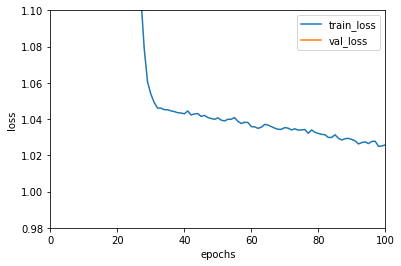

In [70]:
import json
with open('trained_encoders/' + model_name + '/train_history.json', 'r')  as file:
    hist = json.load(file)

print(hist.keys())
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
#plt.title('Wide Gaziv Encoder Loss Curves')
plt.ylim(0.98, 1.1)
plt.xlim(0, 100)
#plt.savefig(os.path.join('trained_encoders', model_name, 'val_loss_zoom.png'), bbox_inches='tight', facecolor='white')
best = np.argmin(hist['val_loss'])
print('epochs: ', best + 1)
print(hist['val_loss'][best])
print(hist['val_mean_squared_error'][best])
print(hist['val_mean_absolute_error'][best])
print(hist['val_cosine_proximity'][best])
# print(hist['val_mse_cosine_loss'][best])


-0.04367668102056058
479 15.491591203104788
24
0.11335014542118584 0.08984446452338646
0.11477944613005481 0.09110278603348917
0.5278896531577222 0.534957376867507
0.20991538 0.19156705


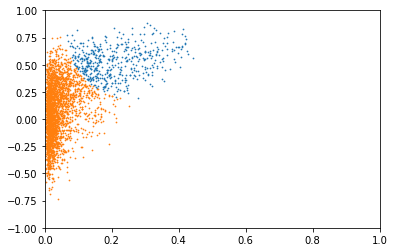

In [71]:
stds = np.std(y_pred, axis=0)
voxel_corr = np.array(voxel_corr)
vc_p = np.array(vc_p)


stds_norm = stds/stdtest
vp = np.where(voxel_corr > 0)
vn = np.where(voxel_corr < 0)

vc_std = voxel_corr * stds
vc_std_norm = voxel_corr * stds_norm
print(np.min(vc_std))

vt = np.where(vc_std > abs(np.min(vc_std)))
vb = np.where(vc_std < abs(np.min(vc_std)))
print(len(vt[0]), len(vt[0])/NUM_VOXELS*100)
print(len(np.where(vc_p < 0.0001)[0]))
print(np.mean(vc_std[vt]), np.median(vc_std[vt]))
print(np.mean(vc_std_norm[vt]), np.median(vc_std_norm[vt]))
print(np.mean(voxel_corr[vt]), np.median(voxel_corr[vt]))
print(np.mean(stds[vt]), np.median(stds[vt]))
plt.scatter(stds[vt], voxel_corr[vt], s=0.5)
plt.scatter(stds[vb], voxel_corr[vb], s=0.5)
plt.ylim(-1, 1)
plt.xlim(0, 1)
plt.show()